In [33]:
import pandas as pd

df = pd.read_csv("../combined_data/combined_data.csv")

In [35]:
df.head()

,word_1,word_2,condition,WUP_score,correct_incorrect,key_pressed,response_status,reaction_time,age_list,participant_id
0,bread,utrtbe,3,0.00,0,n,1,1389.216185,18,1
1,bread,laptop,4,0.20,1,y,1,1108.018875,18,1
2,engine,tairn,2,0.00,0,n,1,1035.490990,18,1
3,doctor,shampoo,4,0.21,1,y,1,937.063217,18,1
4,engine,train,1,0.63,1,y,1,1017.201900,18,1


In [36]:
df.shape

(1140, 10)

In [ ]:
print(df.describe())

         condition    WUP_score  correct_incorrect  response_status  \
count  1140.000000  1140.000000        1140.000000      1140.000000   
mean      2.500000     0.257763           0.500000         0.883333   
std       1.118525     0.317308           0.500219         0.432932   
min       1.000000     0.000000           0.000000         0.000000   
25%       1.750000     0.000000           0.000000         1.000000   
50%       2.500000     0.045000           0.500000         1.000000   
75%       3.250000     0.485000           1.000000         1.000000   
max       4.000000     0.950000           1.000000         2.000000   

       reaction_time     age_list  participant_id  
count    1140.000000  1140.000000      1140.00000  
mean     1148.259776    20.600000         8.00000  
std       370.965733     2.092169         4.32239  
min        27.019978    18.000000         1.00000  
25%       893.618047    19.000000         4.00000  
50%      1079.154968    20.000000         8.0000

In [42]:
print(df.value_counts("age_list")/76)

age_list
19    4.0
20    3.0
18    2.0
22    2.0
21    1.0
23    1.0
24    1.0
25    1.0
Name: count, dtype: float64


In [28]:
# Accuracy by Participant
# We group by 'participant_id' and look at 'correct_incorrect'
participant_accuracy = df.groupby('age_list')['response_status'].mean()
print("\nAccuracy Percentage per Participant:")
print(participant_accuracy)


Accuracy Percentage per Participant:
age_list
18    0.881579
19    0.855263
20    0.925439
21    0.907895
22    0.855263
23    0.934211
24    0.894737
25    0.842105
Name: response_status, dtype: float64


In [29]:
# Performance by Condition
# We group by 'condition' to see if reaction times or scores differ
condition_analysis = df.groupby('condition')[['reaction_time', 'WUP_score']].mean()
print("\nAverage RT and Score by Condition:")
print(condition_analysis)


Average RT and Score by Condition:
           reaction_time  WUP_score
condition                          
1            1123.212102   0.748947
2            1181.363443   0.000000
3            1168.658176   0.000000
4            1119.805384   0.282105


In [31]:
# Calculate the data
participant_accuracy = df.groupby('age_list')['response_status'].mean() * 100
print(participant_accuracy)

age_list
18    88.157895
19    85.526316
20    92.543860
21    90.789474
22    85.526316
23    93.421053
24    89.473684
25    84.210526
Name: response_status, dtype: float64


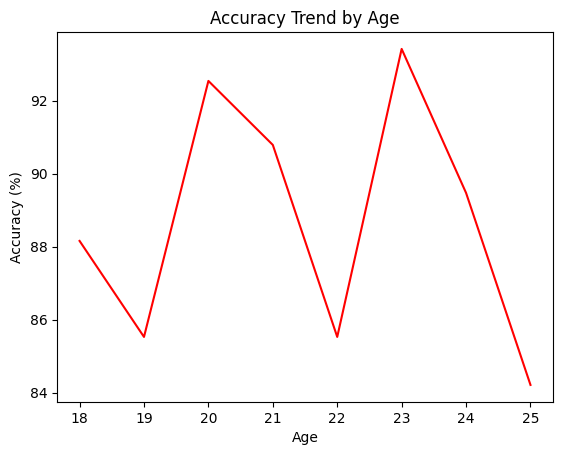

In [32]:
import matplotlib.pyplot as plt

plt.plot(participant_accuracy.index, participant_accuracy.values, color='red')
plt.title('Accuracy Trend by Age')
plt.xlabel('Age')
plt.ylabel('Accuracy (%)')
plt.show()